<a href="https://colab.research.google.com/github/EricSiq/Supervised-Machine-Learning-Lab/blob/main/SML_EnsembleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv('penguins_size.csv')


In [3]:

# Preview data
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [4]:

# Select relevant numeric features
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
target = 'species'

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + [target])



In [5]:

# Encode target variable
df[target] = df[target].astype('category').cat.codes  # species: 0, 1, 2

# Define X and y
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)


In [7]:

# Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.9565217391304348

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        22

    accuracy                           0.96        69
   macro avg       0.93      0.97      0.95        69
weighted avg       0.97      0.96      0.96        69



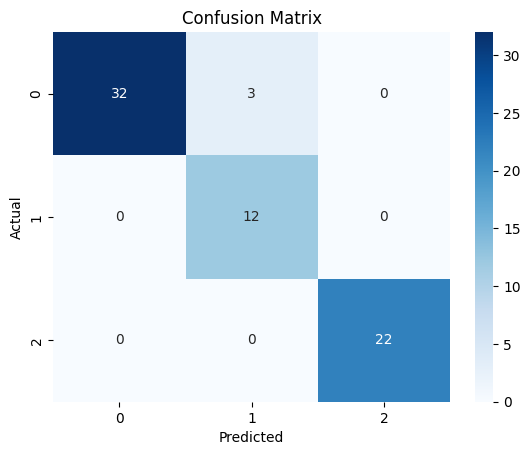

In [8]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['species'].astype('category').cat.categories,
            yticklabels=df['species'].astype('category').cat.categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:


# Feature Importance
importances = rf_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)


<ipython-input-10-152024d1251e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')


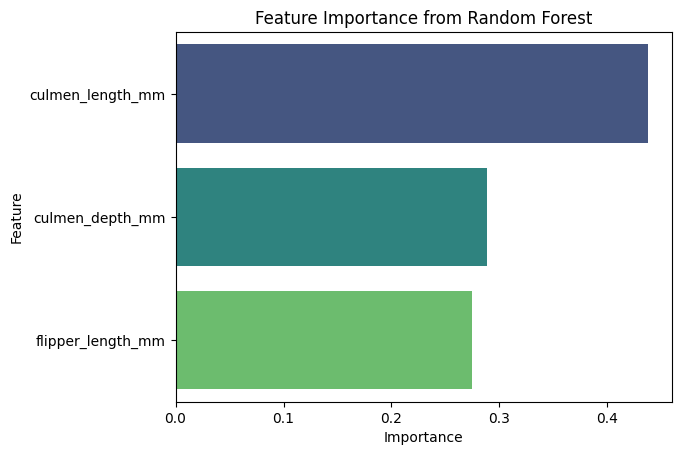

In [10]:

# Plot Feature Importances
sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()